In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
print(os.getcwd())

D:\PESU\Sem 5\Data Analytics\DataAnalytics


In [4]:
path = os.getcwd() + "\Datasets\\"
print(os.listdir())
df = pd.read_csv("Indicator.csv")
df.head()

['.git', '.ipynb_checkpoints', 'Access_CSVs.ipynb', 'Datasets', 'Indicator.csv', 'README.md']


,Indicator_Code,Indicator_Name
0,SP.POP.GROW,Population Growth (in %)
1,SI.POV.GINI,Gini Index
2,NY.GDP.PCAP.KD.ZG,GDP per capita growth (in %)
3,SE.XPD.TOTL.GB.ZS,"Government expenditure on education, total (% ..."
4,SE.XPD.TOTL.GD.ZS,"Government expenditure on education, total (% ..."


### To access the dataset(s) for any indicator(s), do the following:
- Find out the corresponding Inidcator_Code using Indicator.csv
- That code becomes the name of the folder to access as ```newPath = path + "\\<Indicator_Code>"```
- Each indicator folder has two csvs having the metadata and the main csv file containing the data. This file begins with "API_.... .csv"
- The main csv is the first element to be listed in os.listdir
- Run: ```df = pd.read_csv(newPath + os.listdir(newPath)[0])```

In [13]:
indicator_csvs = [path + i for i in df.Indicator_Code]
df1 = ["\\".join(i.split("\\")) for i in indicator_csvs]
#print(df1)
#To get the population growth CSV
pop_grow = pd.read_csv(df1[0] + "\\" + os.listdir(df1[0])[0])#, sep='delimiter',header=None)#, error_bad_lines=False)

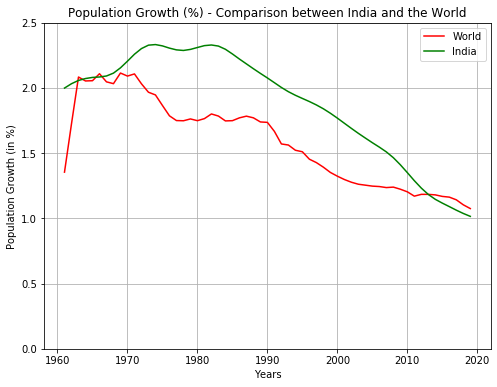

In [17]:
worldPop = pop_grow[pop_grow["Country Name"]=="World"]
indiaPopn = pop_grow[pop_grow["Country Name"]=="India"]
growthWorld = {}
growthIndia = {}

k = 5
for i in worldPop.iloc[:,5:]:
    growthWorld[int(i)] = worldPop.iloc[0,k]
    growthIndia[int(i)] = indiaPopn.iloc[0,k]
    k+=1

plt.figure(figsize=(8,6))
plt.grid(True)
plt.title("Population Growth (%) - Comparison between India and the World")
plt.xlabel("Years")
plt.ylabel("Population Growth (in %)")
plt.ylim(0,2.5)
plt.plot(np.array(list(growthWorld.keys())),np.array(list(growthWorld.values())),color="red")
plt.plot(np.array(list(growthIndia.keys())),np.array(list(growthIndia.values())),color="green")
plt.legend(["World","India"])
plt.show()

In [35]:
#To check if population growth is increasing for any country

k = 0
countriesIncPop = []
for i in pop_grow["Country Name"]:
    if pd.Index(pop_grow.iloc[k,5:]).is_monotonic_decreasing == False:
        print(i)
    k+=1


Aruba
Afghanistan
Angola
Albania
Andorra
Arab World
United Arab Emirates
Argentina
Armenia
American Samoa
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas, The
Bosnia and Herzegovina
Belarus
Belize
Bermuda
Bolivia
Brazil
Barbados
Brunei Darussalam
Bhutan
Botswana
Central African Republic
Canada
Central Europe and the Baltics
Switzerland
Channel Islands
Chile
China
Cote d'Ivoire
Cameroon
Congo, Dem. Rep.
Congo, Rep.
Colombia
Comoros
Cabo Verde
Costa Rica
Caribbean small states
Cuba
Curacao
Cayman Islands
Cyprus
Czech Republic
Germany
Djibouti
Dominica
Denmark
Algeria
East Asia & Pacific (excluding high income)
Early-demographic dividend
East Asia & Pacific
Europe & Central Asia (excluding high income)
Europe & Central Asia
Ecuador
Egypt, Arab Rep.
Euro area
Eritrea
Spain
Estonia
Ethiopia
European Union
Fragile and conflict affected situations
Finland
Fiji
France
Faroe Islands
Micronesia, Fed. Sts.
Gabon
United Kingdo